Load the `ISLR2` and `tidyverse` packages.

In [8]:

library('ISLR2')
library('tidyverse')


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [9]:

glimpse(Auto)


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

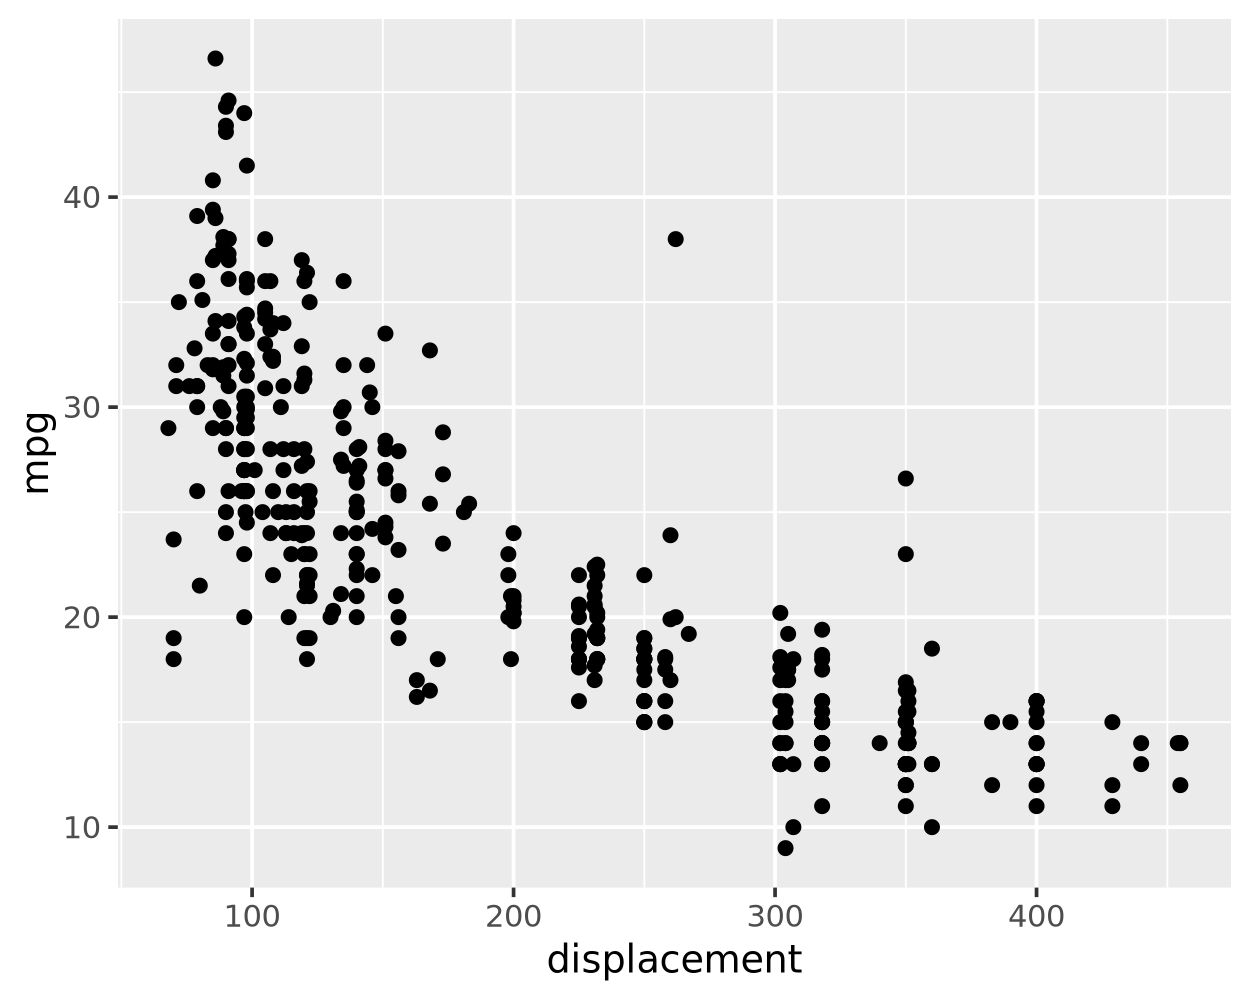

In [10]:
ggplot(Auto, aes(y = mpg, x = displacement)) +
    geom_point()

❓Does the relationship of `mpg` to `displacement` look linear?

I guess you could make the argument that it looks linear, but in my opinion it looks to be a negative exponential function.

I was curious to see what a line fit to the data would look like so I created it below:


In [11]:
library('tidymodels')
rec = recipe(mpg ~ displacement, data = Auto) |>
    step_poly(displacement, degree = 2, options = c(raw = TRUE)) |>
    prep()

rec |> juice() |> bind_cols(Auto |> select(displacement)) |> head()

Warning message in opts$degree <- x$degree:
“Coercing LHS to a list”


mpg,displacement_poly_1,displacement_poly_2,displacement
<dbl>,<dbl>,<dbl>,<dbl>
18,307,94249,307
15,350,122500,350
18,318,101124,318
16,304,92416,304
17,302,91204,302
15,429,184041,429


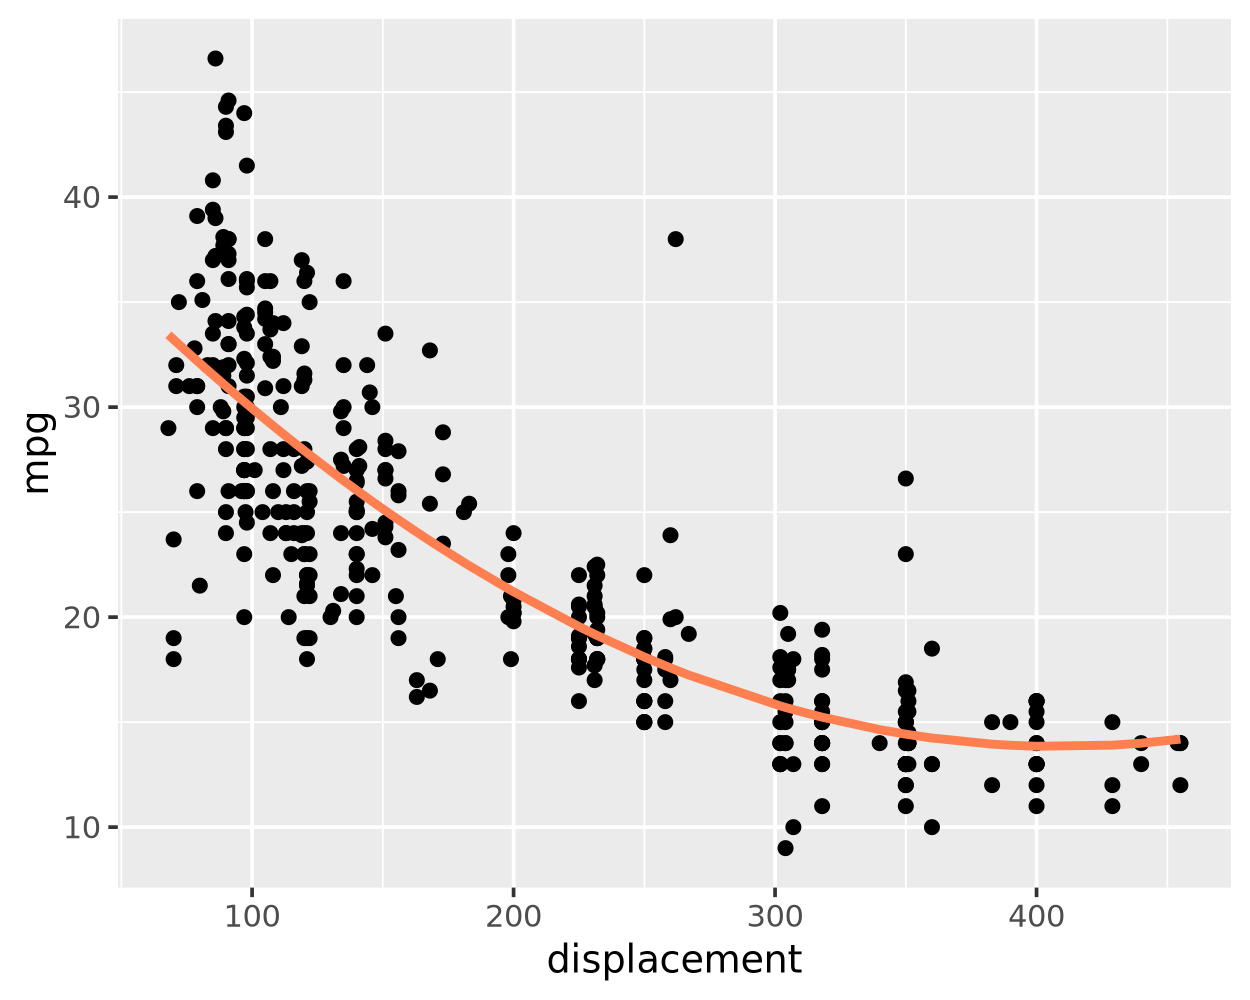

In [14]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

predict(mod_fit, rec |> juice()) |> 
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point() +
    geom_line(aes(y = .pred), linewidth = 1.2, color = 'coral')

Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [16]:
rec = recipe(mpg ~ displacement+cylinders, data = Auto) |>
    step_poly(displacement, degree = 2, options = list(raw = TRUE)) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) |>
    prep()

rec |> juice() |> head()

mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(mpg ~ ., data = rec |> juice())

mpg,displacement_poly_1,displacement_poly_2,cyl_cat_X4,cyl_cat_X5,cyl_cat_X6,cyl_cat_X8
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,307,94249,0,0,0,1
15,350,122500,0,0,0,1
18,318,101124,0,0,0,1
16,304,92416,0,0,0,1
17,302,91204,0,0,0,1
15,429,184041,0,0,0,1


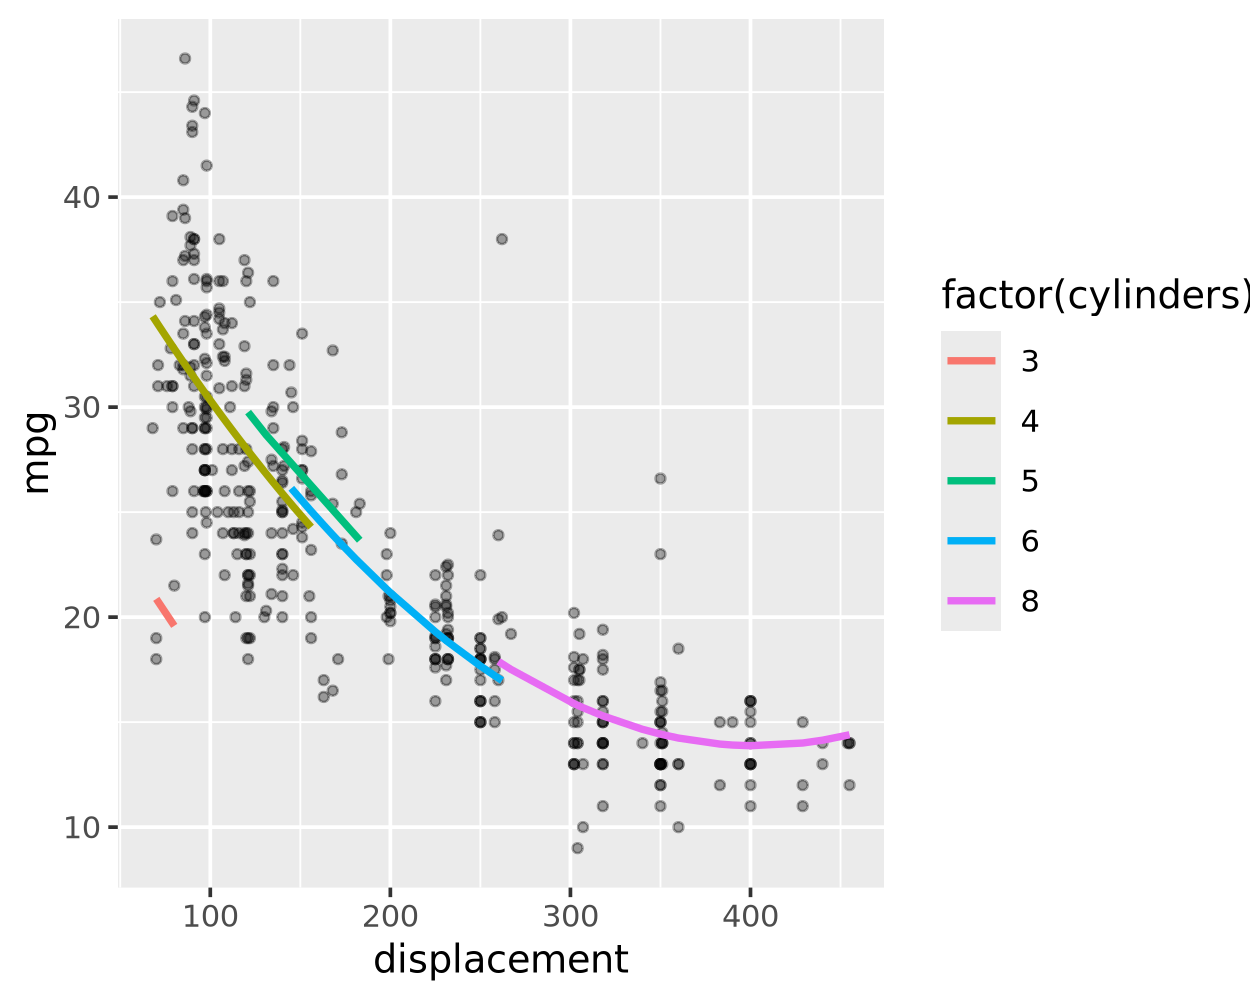

In [17]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)